1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use Pipeline
    4. a. Use scaler and dimensional reduction (if it is necessary).
    4. b. Use suitable Naive Bayes for this problem. 
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What are your scaler, dimensional reduction and naive bayes model as well as their params? (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

A Travel Company Is Offering Travel Insurance Packages To Their Customers. The new insurance plan also covers Covid-19. The Company Claims To Know Which Customers Are Interested To Buy It Based On The Company's Database History.

* Age - Age Of The Customer
* Employment Type - The Sector In Which Customer Is Employed
GraduateOrNot - Whether The Customer Is College Graduate Or Not
* AnnualIncome - The Yearly Income Of The Customer In Indian Rupees
* FamilyMembers - Number Of Members In Customer's Family
* ChronicDisease - Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
* FrequentFlyer - Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years (2017-2019).
* EverTravelledAbroad - Has The Customer Ever Travelled To A Foreign Country
* TravelInsurance - Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

## Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


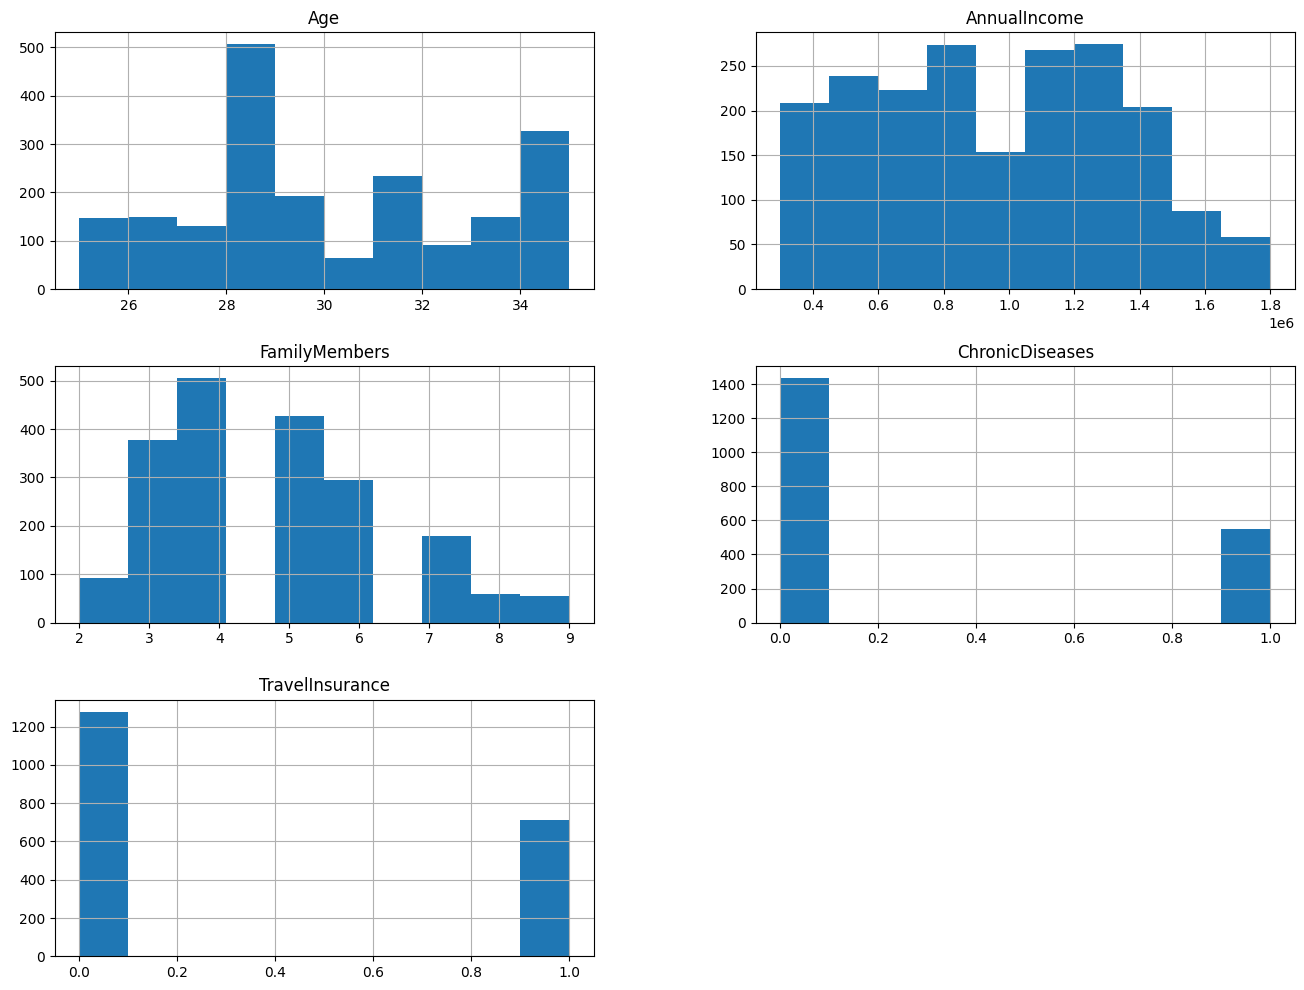

In [ ]:
import pandas as pd
PATH = "./TravelInsurancePrediction.csv" # Path to your file

df = pd.read_csv(PATH)
df = df.drop(df.columns[df.columns.str.contains('Unnamed')], axis=1)
#ToDo: Show histogram of dataframe
df.hist(figsize=(16, 12))
df.head()

## Data Analysis

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB
None


In [ ]:
# Get basic statistics of dataframe such as: number of samples, mean, std, min, etc
print(df.describe())

               Age  AnnualIncome  FamilyMembers  ChronicDiseases  \
count  1987.000000  1.987000e+03    1987.000000      1987.000000   
mean     29.650226  9.327630e+05       4.752894         0.277806   
std       2.913308  3.768557e+05       1.609650         0.448030   
min      25.000000  3.000000e+05       2.000000         0.000000   
25%      28.000000  6.000000e+05       4.000000         0.000000   
50%      29.000000  9.000000e+05       5.000000         0.000000   
75%      32.000000  1.250000e+06       6.000000         1.000000   
max      35.000000  1.800000e+06       9.000000         1.000000   

       TravelInsurance  
count      1987.000000  
mean          0.357323  
std           0.479332  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max           1.000000  


In [ ]:
# Get categorical columns and numerical columns
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(exclude='object').columns
print(f'Number of missing  values: {df.isna().sum().sum()}')

Number of missing  values: 0


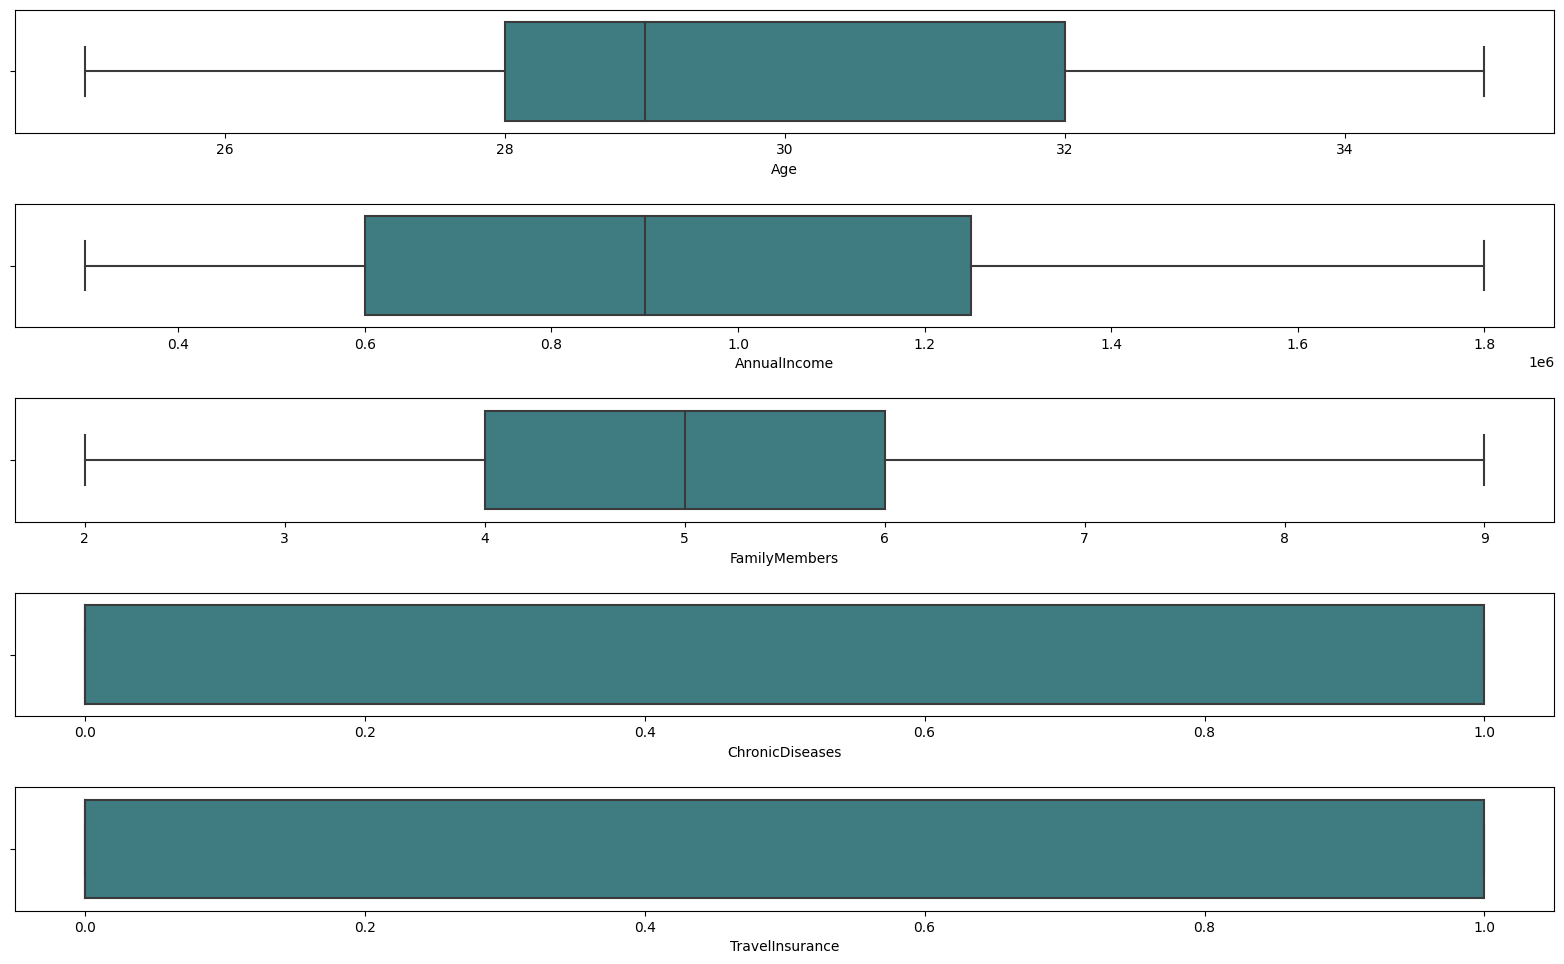

In [ ]:
# Boxplot of every numerical columns
fig, axes=plt.subplots(len(numerical_cols), 1, figsize=(16, 2*len(numerical_cols)),sharex=False,sharey=False)
for i, column in enumerate(numerical_cols):
    sns.boxplot(x=column,data=df,palette='crest',ax=axes[i])
plt.tight_layout(pad=2.0)

<ipython-input-9-3857f0723db1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

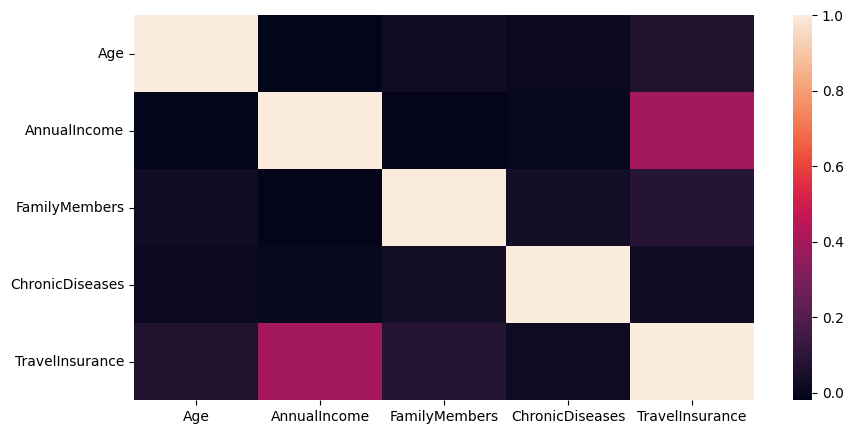

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr())

## Preprocessing

In [ ]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    df = df.drop_duplicates()
    null_values = df.isna().sum().sum()
    if null_values != 0:
        imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
        cols = df.columns
        df = imp_mean.fit_transform(df)
        df = pd.DataFrame(df, columns=cols)  
    return df

In [ ]:
df = preprocessing_data(df)
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## Feature Engineering

<Axes: >

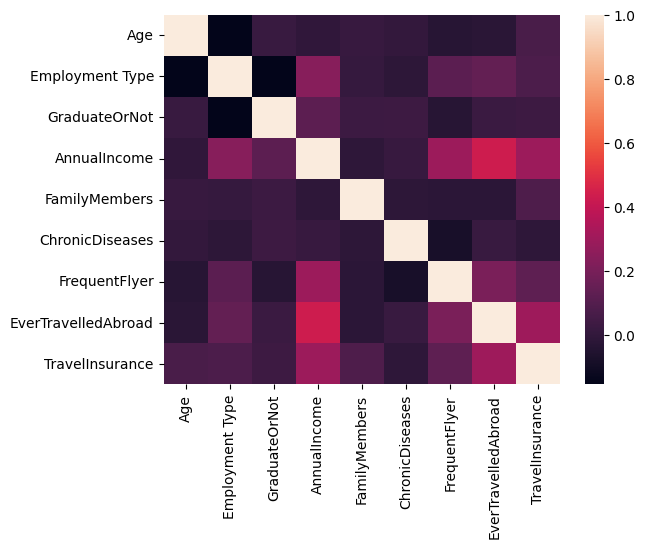

In [ ]:
# Heatmap
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    target = df['TravelInsurance']
    categorical_feats = df.select_dtypes(include='object').columns
    for col in categorical_feats:
        df[col] = df[col].astype('category').cat.codes
    df['TravelInsurance'] = target
    return df

df = apply_feature_engineering(df)
sns.heatmap(df.corr())

In [ ]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.drop('TravelInsurance', axis=1, inplace=False)
    y = df['TravelInsurance']
    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 2023
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Employment Type'}>,
        <Axes: title={'center': 'GraduateOrNot'}>],
       [<Axes: title={'center': 'AnnualIncome'}>,
        <Axes: title={'center': 'FamilyMembers'}>,
        <Axes: title={'center': 'ChronicDiseases'}>],
       [<Axes: title={'center': 'FrequentFlyer'}>,
        <Axes: title={'center': 'EverTravelledAbroad'}>,
        <Axes: title={'center': 'TravelInsurance'}>]], dtype=object)

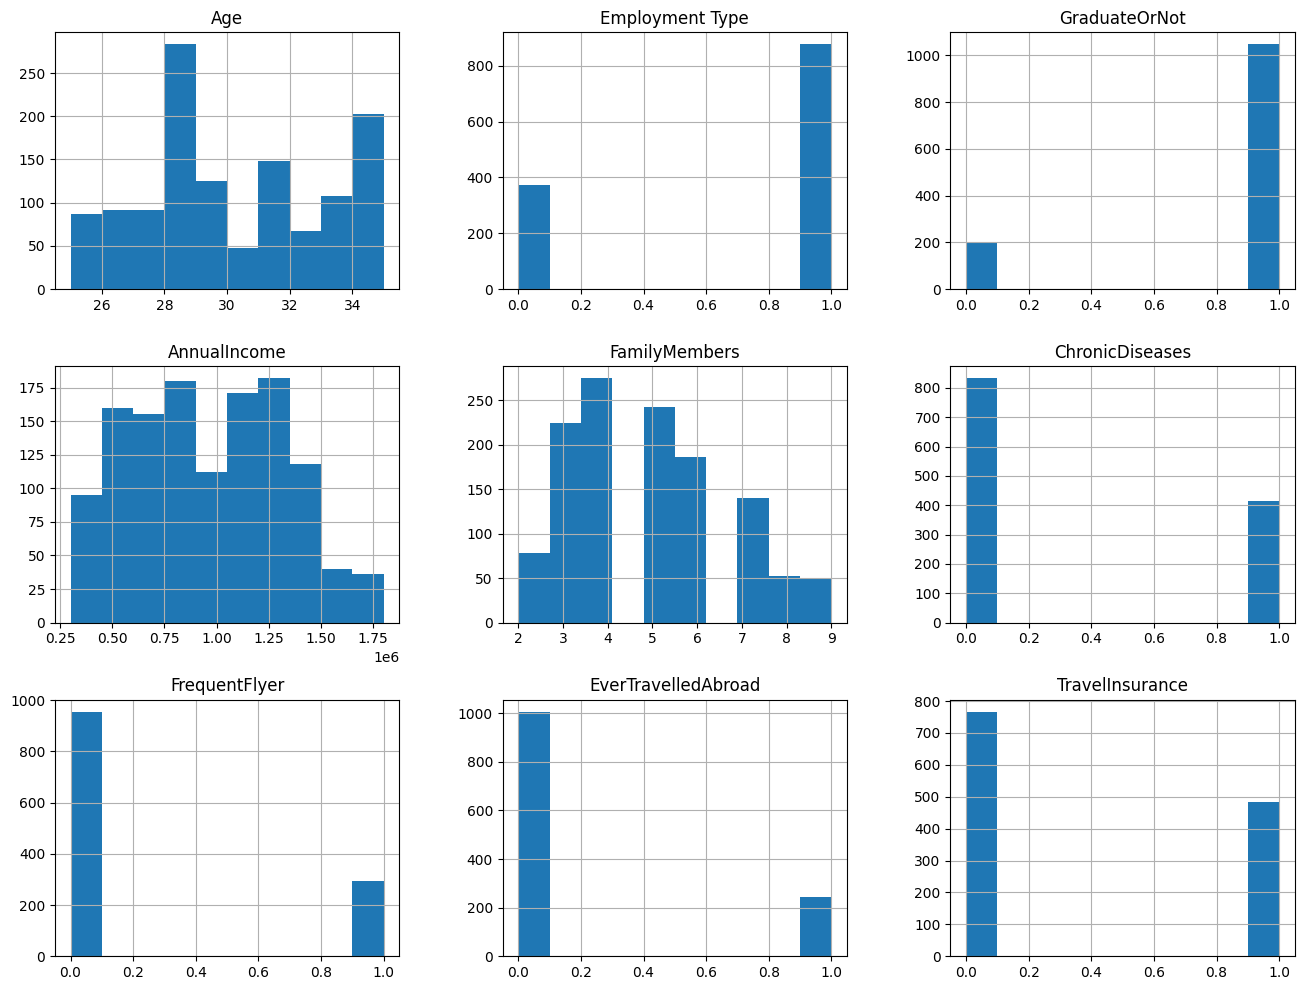

In [ ]:
df.hist(figsize=(16,12))

## Build SK-learn model

Best parameter (CV score=0.551):
{'gau_nb__var_smoothing': 0.0001, 'pca__n_components': 7}
precision 0.6435643564356436
recall 0.4276315789473684
accuracy 0.672
F1 0.5138339920948616


0.5138339920948616

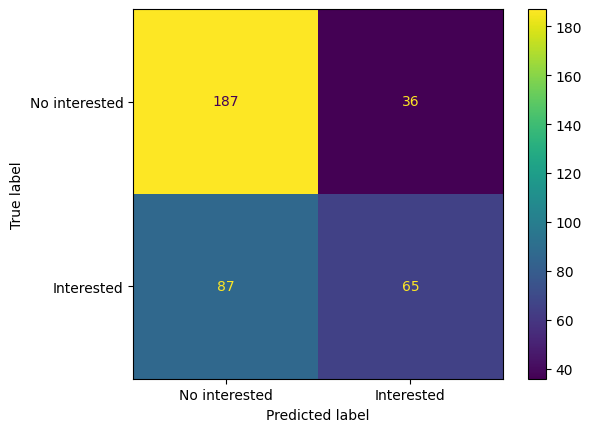

In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import ComplementNB, GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model 
    """
    pca = PCA()
    naive_bayes = GaussianNB()
    pipe = Pipeline(steps=[('pca', pca), ('scaler', StandardScaler()), ('gau_nb', GaussianNB())])
    param_grid = {
        'gau_nb__var_smoothing': np.logspace(-4,-9, num=40),
        "pca__n_components": [3, 5, 7, 8], 
    }
    model = GridSearchCV(pipe, param_grid, scoring="f1", n_jobs=2)
    model.fit(X, y)
    print("Best parameter (CV score=%0.3f):" % model.best_score_)
    print(model.best_params_)
    return model

def calculate_performance(y_true, y_pred):
    """
    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    confusion_mat = confusion_matrix(y_true , y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=['No interested', 'Interested'])
    print("precision", precision_score(y_true, y_pred))
    print("recall", recall_score(y_true, y_pred))
    print("accuracy", accuracy_score(y_true, y_pred))
    print("F1", f1_score(y_true, y_pred))
    cm_display.plot()
    main_score = f1_score(y_true, y_pred)
    return main_score

model = build_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(testX)
calculate_performance(testY, pred)